# An Explanation of the Distribution of Fitness Effects of Mutations (DFEM)

## Preamble

Here we will have an explanation of the meaning of DFEM as implemented in the complex script.

## Load Libraries

In [43]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import scipy.special as special
import scipy.constants as constants
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Parameters

Here are the key variables that implement DFEM in the `m-d-s-complex-dfem.py` script:

In [44]:
lethal = 0.1  # proportion of lethal mutations
mu, sigma = -0.29, 0.31 #mu=mean; sigma=standard deviation
lower, upper = -1.0, 1.0 # clips for truncation

The mean, standard deviation, lower and upper variables define a [truncated normal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html). This can be implemented using the truncnorm() function from the scipy stats library:

In [45]:
dfem = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

In [46]:
dfem

Note that the first two arguments within the stats.truncnorm() function are the lower and upper bound of the truncated distribution. As noted in the [manual page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html), these are calculated from the standard normal distribution in which μ = 0 and σ = 1.

## Derivation and Meaning

The `dfem` variable is to be interpreted as `s`, the selection coefficient. The selection coefficient describes the change in fitness, `w` induced by a mutation:

`w = w + s`

Therefore:

`s < 0: fitness will decrease, the mutation is deleterious
s > 0: fitness will increase, the mutation is beneficial
`

Please consult table 2 of [Vale et al. (2012)](https://doi.org/10.1111/j.1558-5646.2012.01691.x) for the actual values of `s` chosen. Note that we have chosen the DFEM observed in the phage ΦX174 grown in _E. coli_ C and we have chosen the Normal distribution.

## Visualising the Distribution

Let's now pick some random variates from this distribution and call them `r`:

In [47]:
r = dfem.rvs(size=100000)

We can now plot these variates against the probability density function ([pdf](https://en.wikipedia.org/wiki/Probability_density_function)) of the distribution to show the effects of the values chosen for the clips, location and scale arguments:

(array([0.19461897, 0.53714026, 1.01261655, 1.28151602, 1.08481963,
        0.63513377, 0.24467977, 0.06288002, 0.01200851, 0.0014694 ]),
 array([-0.99991849, -0.80255849, -0.60519849, -0.40783849, -0.21047849,
        -0.01311849,  0.1842415 ,  0.3816015 ,  0.5789615 ,  0.7763215 ,
         0.9736815 ]),
 <a list of 1 Patch objects>)

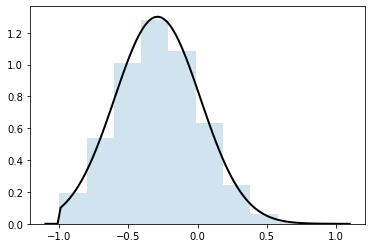

In [48]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-1.1,1.1, num=101)
ax.plot(x, dfem.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

## Changing the Upper and Lower Bounds

Let's change the value of the upper bound to 0 and recreate the graph:

(array([0.16782079, 0.3205397 , 0.52646521, 0.80780006, 1.11243779,
        1.38477153, 1.55429252, 1.53238981, 1.43767808, 1.15704332]),
 array([-9.99894322e-01, -8.99906709e-01, -7.99919095e-01, -6.99931482e-01,
        -5.99943868e-01, -4.99956255e-01, -3.99968641e-01, -2.99981028e-01,
        -1.99993414e-01, -1.00005801e-01, -1.81876232e-05]),
 <a list of 1 Patch objects>)

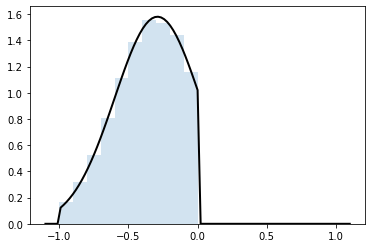

In [49]:
upper = 0.0
dfem1 = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

r1 = dfem1.rvs(size=100000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, dfem1.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.hist(r_d, density=True, histtype='stepfilled', alpha=0.2)

You can see that changing the value of the upper clip to 0 has abolished only values of the variable above 0. Since this variable represents the selection coefficient, this means that all fitness changes will either be 0 (neutral) or negative (deleterious).

Let's take a look at what happens if we set the lower bound to 0 and return the upper bound to 1. We will plot all the PDFs together:

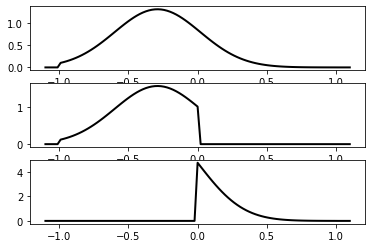

In [50]:
lower, upper = 0.0, 1.0
dfem2 = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

fig, ax = plt.subplots(3)
ax[0].plot(x, dfem.pdf(x), 'k-', lw=2, label='frozen pdf')
ax[1].plot(x, dfem1.pdf(x), 'k-', lw=2, label='frozen pdf')
ax[2].plot(x, dfem2.pdf(x), 'k-', lw=2, label='frozen pdf')

Here you see that setting the lower clip to 0 abolishes all deleterious fitness effects. Most changes are close to 0 (neutral) but larger beneficial effects are possible if exponentially less likely (the tail of the Normal distribution is exponential). The distribution is also clipped at +1.0.

## To Do

This is a quick description of the complex script. More is needed:

* explain the loop that generates the new fitnesses
* highlight memorylessness
* explain the simple script: beneficial, deleterious and residual as neutral - can we graph these?